# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [1]:
# Import of Packages
# import math
import numpy as np
import pandas as pd

# import matplotlib.pyplot as plt
# import random

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [2]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [3]:
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Ploting them

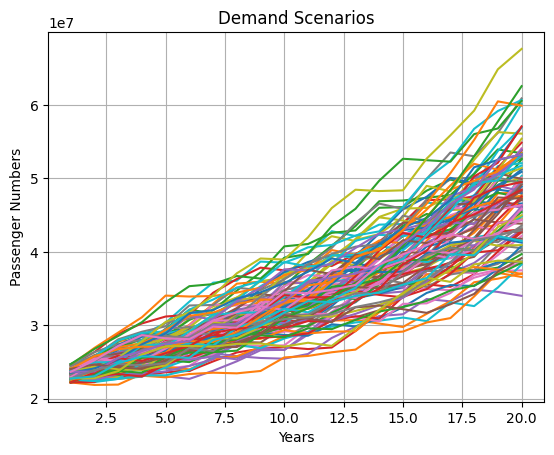

<Figure size 640x480 with 0 Axes>

In [4]:
# Demand at t0
Dt0 = 22561132
# Steptime [Years]
dt = 1
# Time Horizon of Forecasts
Fth = 20
# Number of Forecasts
Forecasts = 100

# Callint the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)

# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, "Demand Scenarios")

## Calculation of the Traditional NPV


Inputs for NPV Calculation

In [5]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

D = Scenario  # Assinging the Scenario as Demand
D_rounded = np.ceil(D / 1000000)

Exporting Data

In [6]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

Creation of a mean Capacity Estimation

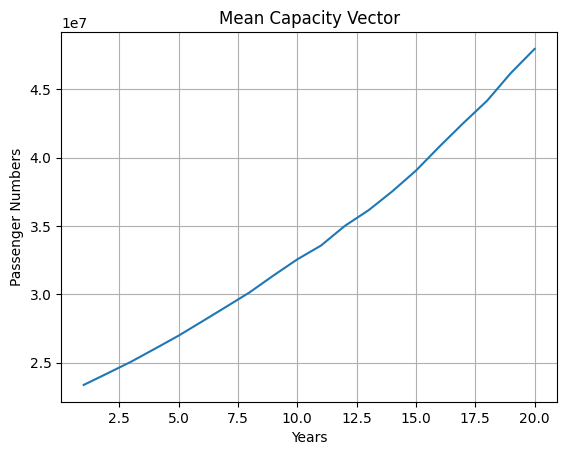

<Figure size 640x480 with 0 Axes>

In [7]:
# Calculate a Mean Scenario as Estimation Vector
meansvalues = np.mean(Scenario, axis=0)

# Assinging the Mean Sceanrio as Capacity Vector
capacity_vector = meansvalues
fn.Scenario_plot(capacity_vector, Fth, "Mean Capacity Vector")

Creation of a Staircase Vector based on the Capacity Estimation

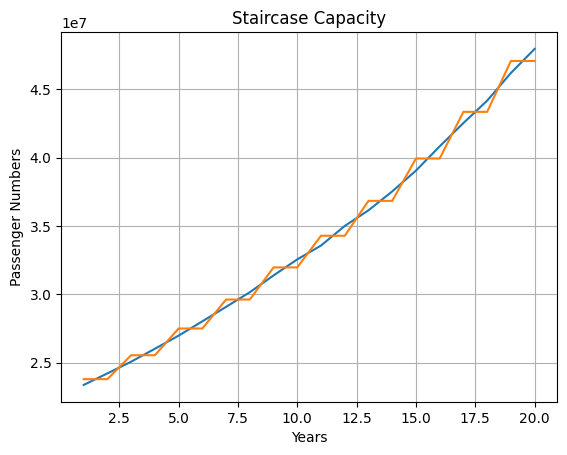

<Figure size 640x480 with 0 Axes>

In [8]:
# Number of Capacity Changes
num_steps = 10
# Qunatify the nonlinear Capacity Vector into a Step Vector
bin_size = len(capacity_vector) // num_steps
staircase_vector = np.zeros(len(capacity_vector))
for i in range(num_steps):
    start_idx = i * bin_size
    end_idx = (i + 1) * bin_size
    if i == num_steps - 1:
        end_idx = len(capacity_vector)
    avg_value = np.mean(capacity_vector[start_idx:end_idx])
    staircase_vector[start_idx:end_idx] = avg_value

K_est = staircase_vector
K_est_rounded = np.ceil(K_est / 1000000)

Capacity_plot = np.array([capacity_vector, staircase_vector])
fn.Scenario_plot(Capacity_plot, Fth, "Staircase Capacity")

Calling the NPV Calculation Function

In [9]:
# To compare with Excel -> We define same Capacity Vector
K_excel_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

# NPV Calculation to compare with Excel
NPV_excel = fn.NPV_Calculation(D_rounded, K_excel_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_excel)

Traditional NPVs =  [ 9978545.29037048  9684863.84770667 10007388.65250866  9025681.93064123
  8059829.69991949  8232879.36822713  7339606.60648541  8254536.0422094
  9922202.95178508  9503859.65060355  9474121.5175774   9750963.41540766
 10543812.22187391  6573936.17956589  6514591.61983877  8191012.19390134
  7882735.26975632  8433995.78851825  9834559.84291003 11696231.48053052
  8824278.04578895  6248124.5602795  11837523.12918481 11667497.72041427
  7843163.3705459   8820514.58809698  8928317.78409824  8825399.39635568
  9889399.18311486 11182365.24863942 10179434.21869743 10299084.73717288
  8548780.64114572  9330708.59132609  7933220.41020394  9024356.87152545
  9549634.43869618 11176080.45777074 10921584.88233827  6476347.7175193
  7351010.85152887  5281110.56126127 10884465.19781023  8083617.7620372
 10124009.65526118 10379636.11596757  7283737.3402566  10060095.4864514
 10485040.17177208  8182982.39236156 11411643.7014104   7387100.43683168
  9122552.86747607  7464894.1974854

Calculating the ENPV

In [10]:
ENPV_excel = np.mean(NPV_excel)
print("Traditional ENPV = ", ENPV_excel)

Traditional ENPV =  9364053.306109203


Calculating the NPV with the estimated Capacity Vector

In [11]:
NPV_est = fn.NPV_Calculation(D_rounded, K_est_rounded, Fth, dt)
print("Traditional NPVs = ", NPV_est)

Traditional NPVs =  [10770285.56174371 10560270.6224739  10723782.89191549  9940665.55413944
  9003416.75281501  9209020.17734098  8263855.35321785  9178784.78894185
 10633872.09426088 10247732.18706774 10350638.26123756 10574776.1518021
 11102969.09793116  7525395.86507385  7438840.36657122  9170681.67612938
  8834194.95526428  9399607.65909159 10554662.49496824 11935220.71522075
  9709180.16200231  7199584.24578745 11946624.3201626  11903746.17358759
  8719591.60640734  9790558.99619293  9790129.19903576  9746238.25358496
 10491621.27274751 11515999.02256539 10887059.1837871  11018048.26084222
  9477733.35259262 10205598.404881    8853578.794828    9993545.91974892
 10446425.6285242  11501708.1410546  11287030.37050167  7427807.40302725
  8327151.66064272  6232570.24676922 11169591.24779721  9059758.57115106
 10752392.3945727  10917450.07229857  8227324.39315211 10814521.22067436
 10933255.20301311  9107566.57390606 11597109.11093151  8363241.24594554
  9935457.99810678  8416353.8829

Calculating the ENPV with the estimated Capacity Vector

In [12]:
ENPV_est = np.mean(NPV_est)
print("Traditional ENPV = ", ENPV_est)

Traditional ENPV =  10094138.79154378


## Creating a Flexible Capacity Vector

In [13]:
# Initial Capacity
K0 = 25

# Capacity Increase for Excel
deltaK_Flex_excel = 5
# Calling the Function to create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, deltaK_Flex_excel)

In [14]:
# Capacity Increase Vector
deltaK_Flex = [5, 10, 20]
# Calling the Function to create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, deltaK_Flex)

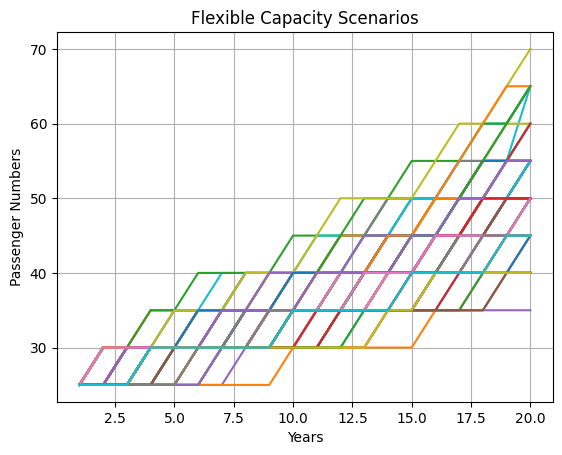

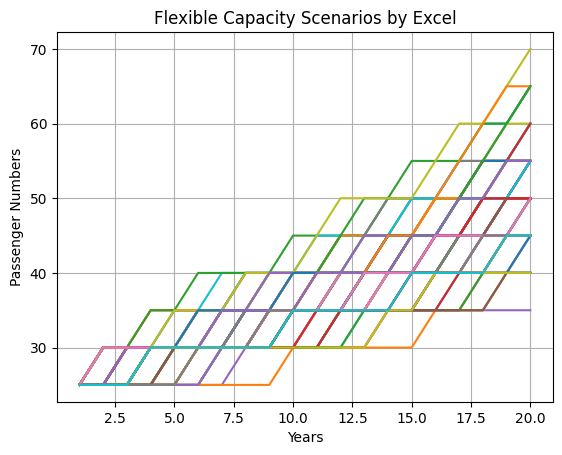

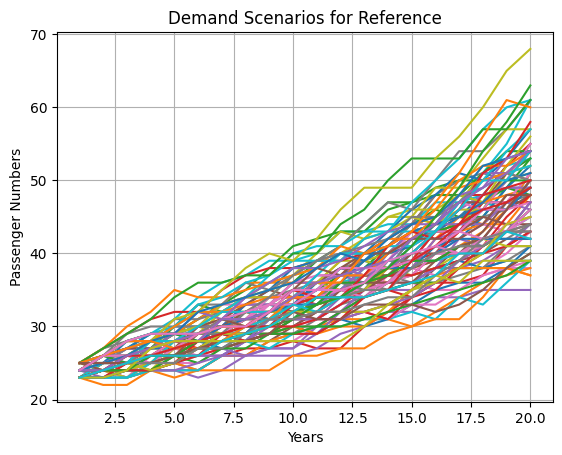

<Figure size 640x480 with 0 Axes>

In [15]:
fn.Scenario_plot(Flexible_Capacity, Fth, "Flexible Capacity Scenarios")
fn.Scenario_plot(Flexible_Capacity_Excel, Fth, "Flexible Capacity Scenarios by Excel")
fn.Scenario_plot(D_rounded, Fth, "Demand Scenarios for Reference")

## Calculation of NPV using the Flexible Capacity Vector

In [16]:
Flex_NPV_excel = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity_Excel, Fth, dt)
print(Flex_NPV_excel)

Flex_ENPV_excel = sum(Flex_NPV_excel)
print(Flex_ENPV_excel)

[10031426.50094501  9825478.69872061 10109689.38275189  9638373.78798364
  9243978.86863446  8958428.36280519  8936590.57871407  9328463.4036919
 10150528.04758626  9844717.24088516  9708378.83919649  9842929.75750941
 10369582.72124269  8290240.44579561  8067912.27954339  9249366.54644983
  8950693.42621886  9154804.68635348  9811436.08395643 11136517.85953212
  9765963.4197708   8051424.96985544 11159034.86005441 11214998.98261338
  8980350.80821616  9499059.95126756  9585470.12133716  9341766.5785097
 10024025.22206725 10984599.79215484 10241871.68650199 10198427.60995781
  9551149.81779246  9697263.12584353  8826021.64184836  9540440.88278853
  9924571.45598369 10700455.98584381 10685533.48387903  8313569.96281238
  8728808.80045136  7762553.76466506 10563309.81345125  8918621.39550546
 10086857.23456187 10141772.13580948  8600428.12572871 10365345.25460194
 10329583.41300159  9189272.535191   11091823.87761226  8891123.8010091
  9611205.34179173  8974906.42631401 10138470.83892841

In [17]:
Flex_NPV_est = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity, Fth, dt)
print(Flex_NPV_est)

Flex_ENPV_est = sum(Flex_NPV_est)
print(Flex_ENPV_est)

[10031426.50094501  9825478.69872061 10109689.38275189  9638373.78798364
  9243978.86863446  8958428.36280519  8936590.57871407  9328463.4036919
 10150528.04758626  9844717.24088516  9708378.83919649  9842929.75750941
 10369582.72124269  8290240.44579561  8067912.27954339  9249366.54644983
  8950693.42621886  9154804.68635348  9811436.08395643 11136517.85953212
  9765963.4197708   8051424.96985544 11159034.86005441 11214998.98261338
  8980350.80821616  9499059.95126756  9585470.12133716  9341766.5785097
 10024025.22206725 10939361.17886459 10241871.68650199 10198427.60995781
  9551149.81779246  9697263.12584353  8826021.64184836  9540440.88278853
  9924571.45598369 10700455.98584381 10685533.48387903  8313569.96281238
  8728808.80045136  7762553.76466506 10563309.81345125  8918621.39550546
 10086857.23456187 10141772.13580948  8600428.12572871 10365345.25460194
 10329583.41300159  9189272.535191   11091823.87761226  8891123.8010091
  9611205.34179173  8974906.42631401 10138470.83892841

Calculating the new ENPV

In [18]:
print("Excel ENPV = ", ENPV_excel)
print("Traditional ENPV = ", ENPV_est)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
print("If Positive => Flexible Excel better -> ", Flex_ENPV_excel - ENPV_excel)
print("If Positive => Flexible better -> ", Flex_ENPV_est - ENPV_est)

Excel ENPV =  9364053.306109203
Traditional ENPV =  10094138.79154378
Flexible ENPV with Excel =  979221643.7588104
Flexible ENPV =  979176405.1455201
If Positive => Flexible Excel better ->  969857590.4527012
If Positive => Flexible better ->  969082266.3539764


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

In [19]:
# # Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# # data)

# plt.plot(
#     Year,
#     Historic_Demand,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Demand for Zurich Airport")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Annual_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Percentage Change of Passenger Demand")
# plt.legend()  # Display legend
# plt.figure()

# plt.plot(
#     Year,
#     Percentage_Change,
#     label="Line Plot",
#     color="blue",
#     marker="o",
# )
# plt.grid(True)
# plt.xlabel("Year")
# plt.ylabel("Passenger Numbers")
# plt.title("Annual Change of Passenger Demand Excluding Outlayers")
# plt.legend()  # Display legend
# plt.figure()